INSTALLATION AND IMPORTING

In [ ]:
!!pip install panda
!!pip install matplotlib

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

THESE ARE OUR DATAFRAMES

In [32]:
df1=pd.read_csv("C:/Users/nkuli/Desktop/Analysis/studentS.csv")
df2=pd.read_csv("C:/Users/nkuli/Desktop/Analysis/books.csv")
pd.set_option('display.width', 1000)
df3=pd.read_csv("C:/Users/nkuli/Desktop/Analysis/author.csv")
df4=pd.read_csv("C:/Users/nkuli/Desktop/Analysis/borrow.csv")
df2=pd.read_csv("C:/Users/nkuli/Desktop/Analysis/books.csv", delimiter=';')
pd.set_option('display.width', 1000)

DISPLAYING OUR DATAFRAMES

In [30]:
print(df1.head())

   studentId    name   surname   birthdate gender class  point
0          1   Hazel     Green  1999-05-15      F    9B    916
1          2  Ashley  Marshall  1999-10-28      F   12D    215
2          3  Ansley     Green  2000-07-12      F   12B    772
3          4  Alcock   Chapman  1999-01-25      F   10C    180
4          5  Meadow    Taylor  1999-12-30      F   11B    215


In [33]:
print(df2.head())

   bookId                                    name  pagecount  point  authorId  typeId
0       1                 A Daughter of the Snows        199     84         3       9
1       2  The Near East: 10 000 Years of History        298     52         9      13
2       3          The Cocoon: A Rest-Cure Comedy         90     26        25      12
3       4                   The Freakshow Murders        321     41         2       3
4       5          Pharaohs Fellahs and Explorers        367     56        19       9


In [34]:
print(df3.head())

   authorId          name    surname
0         1  William Dean    Howells
1         2      Frederic      Brown
2         3          Jack     London
3         4        Albert  Blaisdell
4         5         Ellis     Butler


In [35]:
print(df4.head())

   borrowId  studentId  bookId                takenDate              broughtDate
0         1        360     142  2015-08-09 13:26:00.000  2015-08-20 06:59:00.000
1         2        308     131  2015-08-10 19:44:00.000  2015-08-15 10:46:00.000
2         3        288     160  2015-08-10 22:05:00.000  2015-08-19 17:28:00.000
3         4         57      24  2015-08-11 02:32:00.000  2015-08-17 15:12:00.000
4         5        504     110  2015-08-12 12:05:00.000  2015-08-21 07:16:00.000


OUR ANALYTICAL QUESTIONS

In [36]:
# question 1
# how many books do we have?
record_count = df2.shape
print(record_count)

(168, 6)


In [37]:
# question 2
#Which ten books have been taken the least?

sorted_df = df2.sort_values('point')

# Select the first ten rows with the lowest ratings
lowest_rated_books = sorted_df.head(10)

# Print the result
print("Ten books that have been least taken? :")
print(lowest_rated_books[['name', 'point']])

Ten books that have been least taken? :
                                 name  point
149                The Caves of Steel     21
109                Manhattan Transfer     21
106  Heroic Deeds of American Sailors     21
77                      Indian Summer     21
150                          Carmilla     23
5                          Hard Times     25
62          The Cruise of the Dazzler     25
67                     The home-maker     25
83                       Th bent twig     26
2      The Cocoon: A Rest-Cure Comedy     26


In [40]:
# question 3
# Which ten books have been taken the most?
df1_sorted = df2.sort_values(by='point', ascending=False)[['name', 'point']]
print(df1_sorted.head(10))

                           name  point
135                   Poor Folk    101
64                   The Terror    101
121            Words in Genesis    101
87            Collected Stories    100
7         The Real Mother Goose     99
28           Maybe Mother Goose     98
101  In Exile and Other Stories     97
125                   The Idiot     97
70            Nicholas Nickleby     97
118               The Decameron     94


In [41]:
#Question 4
#Is there a relationship between page count and point?
correlation = df2['pagecount'].corr(df2['point'])
print("Correlation between page count and point:", correlation)


Correlation between page count and point: 0.05909152754002124


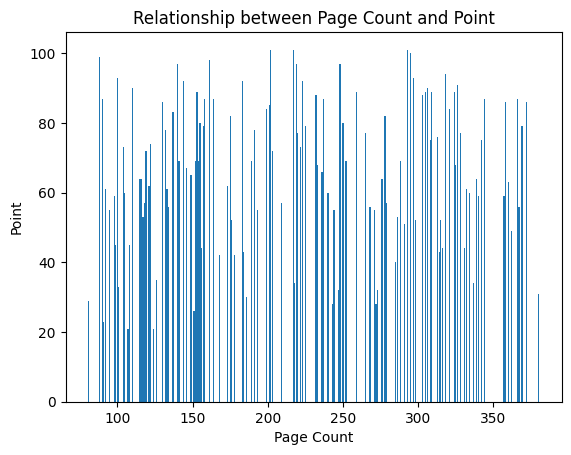

In [67]:


# Scatter plot
plt.bar(df2['pagecount'], df2['point'])
plt.xlabel('Page Count')
plt.ylabel('Point')
plt.title('Relationship between Page Count and Point')
plt.show()


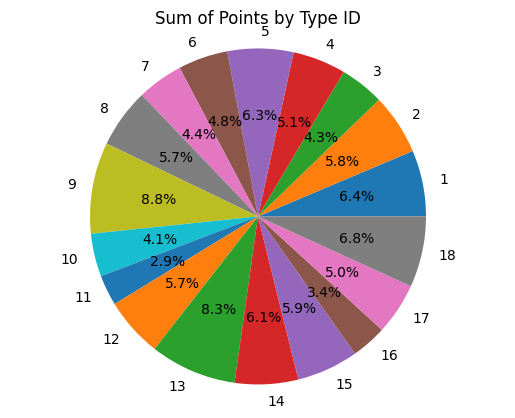

In [74]:
#Question 4
# Which typeid has the most points and which one has the least points?
grouped_df = df2.groupby('typeId')['point'].sum().reset_index()

# Create the pie chart
plt.pie(grouped_df['point'], labels=grouped_df['typeId'], autopct='%1.1f%%')
plt.title('Sum of Points by Type ID')
plt.axis('equal')

# Display the chart
plt.show()

In [77]:
#QUESTION 5
# Convert the 'takenDate' column to datetime
df4['takenDate'] = pd.to_datetime(df4['takenDate'])

# Filter the DataFrame for the years 2015, 2016, and 2017
total_books_borrowed_2015_2017 = df4[(df4['takenDate'].dt.year >= 2015) & (df4['takenDate'].dt.year <= 2017)]

# Convert the x-axis values to strings with the year and month part
x_values = total_books_borrowed_2015_2017['takenDate'].dt.strftime('%Y-%b')
# Count the number of books borrowed in each year
book_counts_0 = total_books_borrowed_2015_2017['takenDate'].dt.year.value_counts().sort_index()

# Print the book counts
print(book_counts_0)


takenDate
2015    1322
2016    3783
2017    1203
Name: count, dtype: int64


In [80]:
#QUESTION 6
# Convert the 'takenDate' column to datetime
df4['broughtDate'] = pd.to_datetime(df4['broughtDate'])

# Filter the DataFrame for the years 2015, 2016, and 2017
total_books_brought_2015_2017 = df4[(df4['broughtDate'].dt.year >= 2015) & (df4['broughtDate'].dt.year <= 2017)]

# Convert the x-axis values to strings with the year and month part
x_values = total_books_brought_2015_2017['broughtDate'].dt.strftime('%Y-%b')

# Calculate the book counts
book_counts_1 = total_books_brought_2015_2017['broughtDate'].dt.year.value_counts().sort_index()

# Print the book counts
print(book_counts_1)



broughtDate
2015    1176
2016    3794
2017    1338
Name: count, dtype: int64


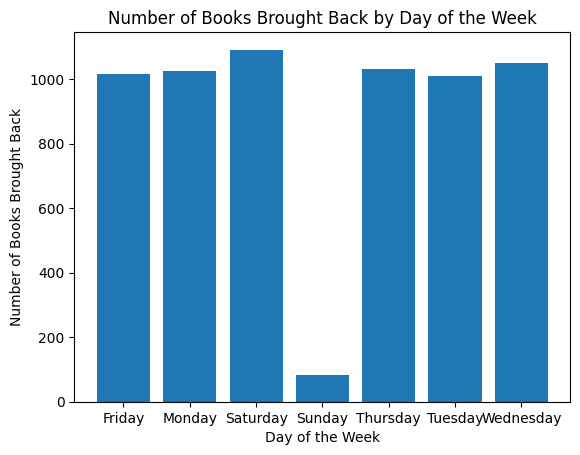

In [82]:
#Question 7*
# what are the days of the week where most books were brought back?

# Convert 'broughtDate' column to datetime format
df4['broughtDate'] = pd.to_datetime(df4['broughtDate'])

# Extract the day of the week from the 'broughtDate' column
df4['day_of_week'] = df4['broughtDate'].dt.day_name()

# Count the number of books brought back for each day of the week
book_counts_by_day = df4['day_of_week'].value_counts().sort_index()

# Create a line plot
plt.bar(book_counts_by_day.index, book_counts_by_day.values)

# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Books Brought Back')
plt.title('Number of Books Brought Back by Day of the Week')

# Display the plot
plt.show()

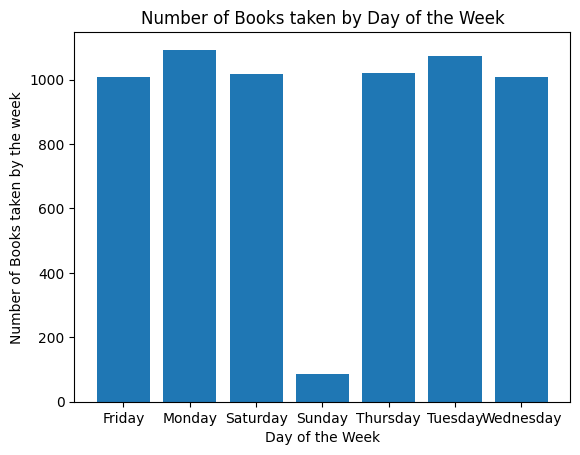

In [84]:
#QUESTION 8
# what are the days of the week where most books were brought back?

# Convert 'broughtDate' column to datetime format
df4['takenDate'] = pd.to_datetime(df4['takenDate'])

# Extract the day of the week from the 'broughtDate' column
df4['day_of_week'] = df4['takenDate'].dt.day_name()

# Count the number of books brought back for each day of the week
book_counts_by_day = df4['day_of_week'].value_counts().sort_index()

# Create a line plot
plt.bar(book_counts_by_day.index, book_counts_by_day.values)

# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Books taken by the week')
plt.title('Number of Books taken by Day of the Week')

# Display the plot
plt.show()

In [61]:
#Question 9*
#how many unique borrowers are there in the dataset?

unique_borrowers_count = df4['studentId'].nunique()
print("Number of unique borrowers:", unique_borrowers_count)

Number of unique borrowers: 504


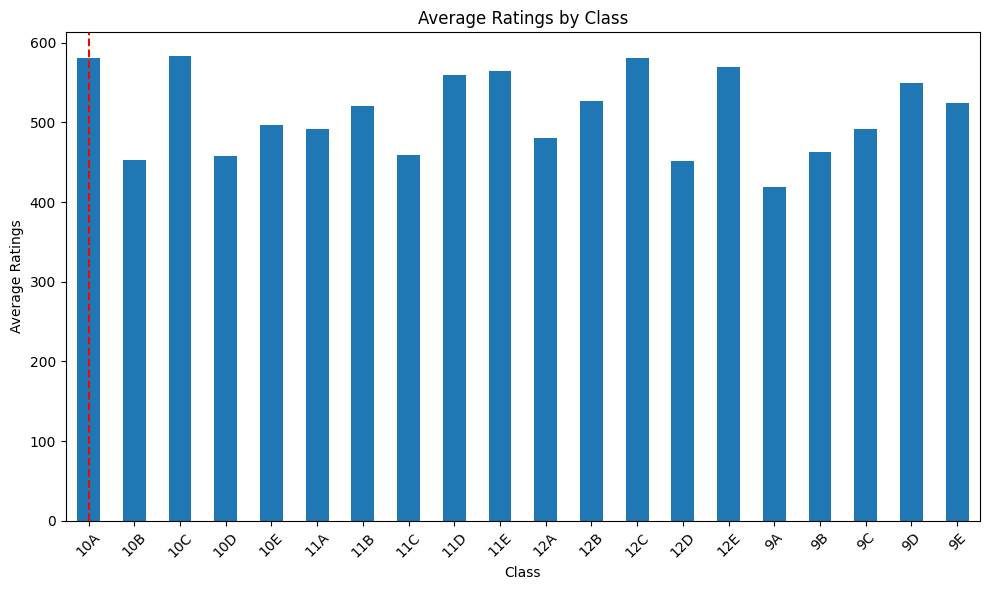

In [62]:
# question 8*
# which class has the highest ratings?
# Group by class and calculate average ratings
average_ratings = df1.groupby('class')['point'].mean()

# Find the class with the highest average ratings
highest_ratings_class = average_ratings.idxmax()

# Create a bar graph
plt.figure(figsize=(10, 6))
average_ratings.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Average Ratings')
plt.title('Average Ratings by Class')
plt.xticks(rotation=45)
plt.tight_layout()

# Highlight the class with the highest ratings
plt.axvline(x=highest_ratings_class, color='red', linestyle='--')

# Display the bar graph
plt.show()

In [63]:
# question 10
# what is the median age of the readers

# Convert the 'birthdate' column to datetime format
df1['birthdate'] = pd.to_datetime(df1['birthdate'])

# Calculate the age by subtracting the birthdate from the current date
current_date = pd.to_datetime('today').normalize()
df1['age'] = (current_date - df1['birthdate']).dt.days // 365

# Calculate the median age of the readers
median_age = df1['age'].median()

# Print the result
print("Median age of the readers:", median_age)


Median age of the readers: 23.0


In [64]:
# Question 21
# Which classs has the highest points?
class_sums = df1.groupby('class')['point'].sum().reset_index(name='sum_points')
class_sums = class_sums.sort_values('sum_points', ascending=False)
print(class_sums)

#Class 11C

   class  sum_points
7    11C       16965
12   12C       16250
19    9E       15719
14   12E       15371
9    11E       15252
18    9D       14826
11   12B       14220
8    11D       14003
0    10A       13361
17    9C       13284
3    10D       13281
4    10E       12909
13   12D       12660
6    11B       12487
16    9B       11102
2    10C       10510
1    10B        9510
10   12A        9139
5    11A        8852
15    9A        8389
